In [29]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://patentimages.storage.googleapis.com/WO2010053874A1/imgf000014_0001.png")

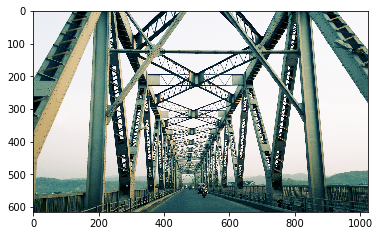

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as image
%matplotlib inline

img = np.array(image.open('bridge.jpg'))
plt.imshow(img, interpolation='nearest')

In [31]:
def Gaussian(shape=(3, 3), sigma=1):
    m,n = [(s-1)/2 for s in shape]
    y, x = np.ogrid[-m:m+1, -n:n+1]
    gauss = 1/(2*np.pi*(sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))
    su = gauss.sum()
    if not su:
        gauss/=su
    return gauss

In [33]:
Image(url="http://www.librow.com/content/common/images/articles/article-9/2d_distribution.gif")

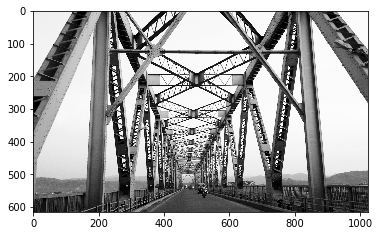

In [34]:
gray = np.zeros((img.shape[0], img.shape[1]))

for i in range(len(img)):
    for j in range(len(img[i])):
        gray[i][j] = 0.299*img[i][j][0] + 0.587*img[i][j][1] + 0.114*img[i][j][2]

plt.imshow(gray, interpolation='nearest', cmap=plt.get_cmap('gray'))

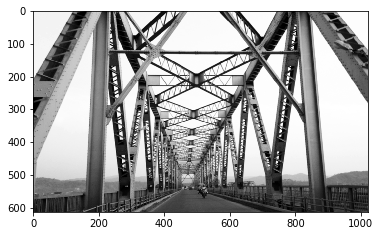

In [36]:
##### SIGMA = 1 #####

gauss1 = Gaussian()
gaussian1 = np.zeros((gray.shape[0]-2, gray.shape[1]-2))

for i in range(gray.shape[0]-2):
    for j in range(gray.shape[1]-2):
        gaussian1[i][j] = np.sum(np.multiply(gray[i:i+3, j:j+3], gauss1))

plt.imshow(gaussian1, interpolation='nearest', cmap=plt.get_cmap('gray'))

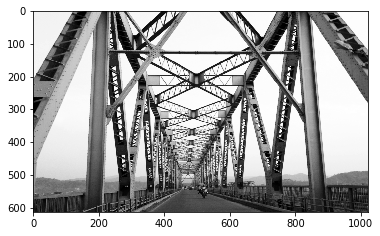

In [37]:
##### SIGMA = 0.5 #####

gauss2 = Gaussian(sigma=0.5)
gaussian2 = np.zeros((gray.shape[0]-2, gray.shape[1]-2))

for i in range(gray.shape[0]-2):
    for j in range(gray.shape[1]-2):
        gaussian2[i][j] = np.sum(np.multiply(gray[i:i+3, j:j+3], gauss2))

plt.imshow(gaussian2, interpolation='nearest', cmap=plt.get_cmap('gray'))

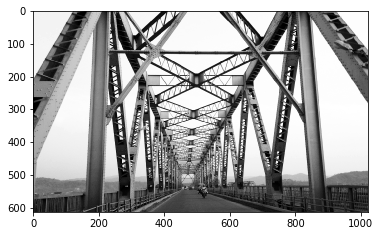

In [38]:
##### SIGMA = 5 #####

gauss3 = Gaussian(sigma=5)
gaussian3 = np.zeros((gray.shape[0]-2, gray.shape[1]-2))

for i in range(gray.shape[0]-2):
    for j in range(gray.shape[1]-2):
        gaussian3[i][j] = np.sum(np.multiply(gray[i:i+3, j:j+3], gauss3))

plt.imshow(gaussian3, interpolation='nearest', cmap=plt.get_cmap('gray'))